In [2]:
import os

In [15]:
import dcmstack

In [7]:
import glob

In [20]:
import subprocess

In [32]:
import tqdm

In [38]:
import zipfile

In [43]:
import nibabel

In [44]:
import gzip

In [56]:
import shutil

In [68]:
import json

In [203]:
import numpy as np

In [182]:
from PIL import Image

In [4]:
pancreas_fold = '/blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/Pancreas-CT/'

In [5]:
pancreas_subjects = [f for f in os.listdir(pancreas_fold) if f.startswith('PANCREAS')]

In [9]:
output_folder= os.path.join(pancreas_fold,'img')
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [23]:
def find_dicom_folder(root_folder):
    for folder in os.listdir(root_folder):
        full_path = os.path.join(root_folder, folder)
        if os.path.isdir(full_path):  # Check if it's a directory
            if has_dicoms(full_path):  # If the subfolder contains DICOM files
                return full_path
            else:
                found_in_subfolder = find_dicom_folder(full_path)  # Recursively search within subfolders
                if found_in_subfolder:  # If we found it in a subfolder, return that path
                    return found_in_subfolder

    return None  # If no DICOM files were found anywhere

def has_dicoms(folder):
    for file in os.listdir(folder):
        full_path = os.path.join(folder, file)
        if full_path.endswith('.dcm') or full_path.endswith('.DCM'):  # Check for DICOM file extensions
            return True
    return False

In [29]:
def convert_dicom_to_nifti(dicom_dir,output_dir,output_filename):

    command = [
        'dcm2niix',
        '-z', 'y',
        '-f', output_filename,
        '-o',output_dir,
        dicom_dir
    ]

    subprocess.run(command,check=True)
    nifti_file = os.path.join(output_dir,f"{output_file_name}.nii.gz")
    return nifti_file

In [31]:
import dicom2nifti

In [33]:
for sub in tqdm.tqdm(pancreas_subjects):
    sub_fold = os.path.join(pancreas_fold,sub)
    if os.path.isdir(sub_fold):
        output_nifti_file = os.path.join(output_folder,sub+'.nii.gz')
        dicom_fold = find_dicom_folder(sub_fold)
        if os.path.isdir(dicom_fold):
            dicom2nifti.dicom_series_to_nifti(dicom_fold,output_nifti_file,reorient_nifti=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [07:23<00:00,  5.54s/it]


In [34]:
#unzip lits test data
lits_data_test = '/blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/04_LiTS/lits_test_data/'

In [36]:
def uncompress_all_files_in_folder(folder_path):
    # Check if input is a valid directory path
    if not os.path.isdir(folder_path):
        raise ValueError(f"'{folder_path}' is not a valid directory path.")
    total_count = 0
    # Traverse through all the contents in the given folder
    for root, dirs, files in os.walk(folder_path):
        # For each file found...
        for file in tqdm.tqdm(files):
            # Get full path to the current file
            full_path = os.path.join(root, file)

            # Check if it's a zip archive (ignore any .pyc or __pycache__ related files)
            if file.endswith('.zip') and not file.startswith('__'):
                try:
                    # Attempt to extract the contents of the zip archive...
                    with zipfile.ZipFile(full_path, 'r') as zip_ref:
                        zip_ref.extractall(root)

                    print(f"Extracted zip file: {full_path}")
                    total_count+=1
                except Exception as e:
                    # If an exception occurs during extraction, catch it and provide a message
                    print(f"Error extracting zip file '{full_path}': {str(e)}")
            else:
                continue
    print(f"\n Total files extracted: {total_count}")

In [39]:
uncompress_all_files_in_folder(lits_data_test)

 10%|██████████████████████████▎                                                                                                                                                                                                                                            | 1/10 [00:09<01:26,  9.56s/it]

Extracted zip file: /blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/04_LiTS/lits_test_data/LITS-Challenge-Test-Data-20240805T232531Z-009.zip


 20%|████████████████████████████████████████████████████▌                                                                                                                                                                                                                  | 2/10 [00:23<01:34, 11.85s/it]

Extracted zip file: /blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/04_LiTS/lits_test_data/LITS-Challenge-Test-Data-20240805T232531Z-007.zip


 30%|██████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                        | 3/10 [00:34<01:20, 11.53s/it]

Extracted zip file: /blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/04_LiTS/lits_test_data/LITS-Challenge-Test-Data-20240805T232531Z-003.zip


 40%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                             | 4/10 [00:45<01:08, 11.36s/it]

Extracted zip file: /blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/04_LiTS/lits_test_data/LITS-Challenge-Test-Data-20240805T232531Z-005.zip


 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                   | 5/10 [00:54<00:53, 10.67s/it]

Extracted zip file: /blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/04_LiTS/lits_test_data/LITS-Challenge-Test-Data-20240805T232531Z-010.zip


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                         | 6/10 [01:05<00:43, 10.87s/it]

Extracted zip file: /blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/04_LiTS/lits_test_data/LITS-Challenge-Test-Data-20240805T232531Z-006.zip


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                               | 7/10 [01:16<00:32, 10.79s/it]

Extracted zip file: /blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/04_LiTS/lits_test_data/LITS-Challenge-Test-Data-20240805T232531Z-008.zip


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 8/10 [01:25<00:20, 10.05s/it]

Extracted zip file: /blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/04_LiTS/lits_test_data/LITS-Challenge-Test-Data-20240805T232531Z-001.zip


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 9/10 [01:35<00:10, 10.15s/it]

Extracted zip file: /blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/04_LiTS/lits_test_data/LITS-Challenge-Test-Data-20240805T232531Z-002.zip


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:45<00:00, 10.58s/it]

Extracted zip file: /blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/04_LiTS/lits_test_data/LITS-Challenge-Test-Data-20240805T232531Z-004.zip

 Total files extracted: 10


In [40]:
lits_folder = '/blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/04_LiTS/LITS/'

In [45]:
lits_out_folder = '/blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/04_LiTS/'

In [41]:
nii_files = glob.glob(os.path.join(lits_folder,'**','*.nii'),recursive=True)

In [48]:
ip_vol = []
ip_seg = []
for file in tqdm.tqdm(nii_files):
    img = nibabel.load(file)
    file_name = file.split('/')[-1]
    if 'volume' in file_name:
        output_folder = os.path.join(lits_out_folder,'img')
        ip_vol.append(file_name)
    if 'segmentation' in file_name:
        output_folder = os.path.join(lits_out_folder,'label')
        ip_seg.append(file_name)
    output_file_name = 'liver_'+file_name.split('.')[0].split('-')[1]+'.nii.gz'
    output_file_path = os.path.join(output_folder,output_file_name)
    #print(output_file_path)

    nibabel.save(img,output_file_path)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 262/262 [32:49<00:00,  7.52s/it]


In [49]:
len(ip_vol) == len(ip_seg)

True

In [50]:
#renaming for KITS dataset

In [52]:
kits_folder = '/blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/05_KiTS/dataset/'
kits_out_fold = '/blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/05_KiTS/'

In [58]:
for fold in tqdm.tqdm(os.listdir(kits_folder)):
    fold_path = os.path.join(kits_folder,fold)
    if os.path.isdir(fold_path):
        num_part = fold.split('_')[1]
        num_part = str(int(num_part)).zfill(4)
        for file in os.listdir(fold_path):
            if file.endswith('.nii.gz'):
                source_path = os.path.join(fold_path,file)
                if 'imaging' in file:
                    file_name = f"img{num_part}.nii.gz"
                    file_path = os.path.join(kits_out_fold,'img',file_name)

                elif 'segmentation' in file:
                    file_name = f"label{num_part}.nii.gz"
                    file_path = os.path.join(kits_out_fold,'label',file_name)
                shutil.copy(source_path,file_path)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [06:36<00:00,  1.24it/s]


In [59]:
#for CT ORG-12 

In [60]:
ct_org_12 = '/blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/12_CT-ORG/OrganSegmentations/'
ct_org_out = '/blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/12_CT-ORG'

In [62]:
for file in tqdm.tqdm(os.listdir(ct_org_12)):
    if file.endswith('.nii.gz'):
        source_path = os.path.join(ct_org_12,file)
        if 'labels' in file:
            dst_folder = os.path.join(ct_org_out,'label',file)
        elif 'volume' in file:
            dst_folder = os.path.join(ct_org_out,'img',file)
        shutil.move(source_path,dst_folder)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 281/281 [00:00<00:00, 1981.77it/s]


In [63]:
#changing name of the flare dataset to 13Abdomentct type

In [64]:
organ_12 = '/blue/kgong/s.kapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/13_AbdomenCT-12organ/'

In [66]:
for fold in os.listdir(organ_12):
    if fold in ['img','label']:
        fold_path = os.path.join(organ_12,fold)
        for file in os.listdir(fold_path):
            if file.endswith('.nii.gz'):
                source_path = os.path.join(fold_path,file)
                destination_path = os.path.join(fold_path,file.replace('FLARE22_Tr','Organ12'))
                shutil.move(source_path,destination_path)

In [65]:
'asdfasdfasdf'.replace('asdf','sdsd')

'sdsdsdsdsdsd'

In [67]:
#doing it for the word file

In [138]:
word_json_file = '/home/s.kapoor/kgong_skapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/WORD/RAOS-Real/overlap_with_word.json'

In [139]:
with open(word_json_file,'r') as jfile:
    data = json.load(jfile)

In [140]:
key_value_splits = data[:-1].split(',')

In [141]:
dic = {}
for key_value_split in key_value_splits:
    value,key = key_value_split.split(':')
    dic[key[2:-1]]=value[2:-1]

In [142]:
#get all the .nii.gz files in the given folder.
def find_nii_gz_files(directory_path):
    """
    Find all .nii.gz files in the given directory.

    Args:
        directory_path (str): The path to the directory where you want to search for .nii.gz files.

    Returns:
        list: A list of absolute paths of all .nii.gz files found.
    """
    nii_gz_files = []
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith('.nii.gz'):
                file_path = os.path.join(root, file)
                nii_gz_files.append(file_path)

    return nii_gz_files

In [143]:
raos_path = '/home/s.kapoor/kgong_skapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/WORD/RAOS-Real/'
nii_gz_files_path = find_nii_gz_files(raos_path)

In [144]:
len(nii_gz_files_path)

826

In [162]:
files_in_raos = {}
for file_name in dic.keys():
    files_in_raos[file_name] = []
for f in nii_gz_files_path:
    file_name = f.split('/')[-1]
    file_name_2 = file_name.split('_')[0]+'.nii.gz' # to address files with _000X values.
    if file_name in dic.keys():
        files_in_raos[file_name].append(f)
    if file_name_2 in dic.keys():
        files_in_raos[file_name_2].append(f)

In [163]:
len(files_in_raos)

150

In [165]:
word_out_fold = '/home/s.kapoor/kgong_skapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/WORD/'

In [166]:
for key,value in tqdm.tqdm(files_in_raos.items()):
    #print(key)
    #print(value)
    #print(dic[key])
    for file in value:
        if 'label' in file:
            dest_path = os.path.join(word_out_fold,'label',dic[key])
        elif 'image' in file:
            dest_path = os.path.join(word_out_fold,'img',dic[key])
        shutil.copy(file,dest_path)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:25<00:00,  5.91it/s]


In [167]:
files_in_raos_sans_image = []
for key,value in files_in_raos.items():
    if len(value)<2:
        files_in_raos_sans_image.append(key)

In [168]:
len(files_in_raos_sans_image)

0

In [169]:
#do it for chaos dataset.

In [170]:
#convert dicom images to img. nii.gz

In [171]:
chaos_train = '/home/s.kapoor/kgong_skapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/03_CHAOS/Train_Sets/CT/'

In [176]:
chaos_train_out = '/home/s.kapoor/kgong_skapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/03_CHAOS/'

In [180]:
for fold in tqdm.tqdm(os.listdir(chaos_train)):
    #print(fold)
    fold_path = os.path.join(chaos_train,fold)
    if os.path.isdir(fold_path):
        for sub_fold in os.listdir(fold_path):
            if "DICOM" in sub_fold:
                sub_fold_path = os.path.join(fold_path,sub_fold)
                output_nifti_file = os.path.join(chaos_train_out,'img',fold+'_image.nii.gz')
                #print(output_nifti_file)
                dicom2nifti.dicom_series_to_nifti(sub_fold_path,output_nifti_file,reorient_nifti=True)
            # elif "ground" in sub_fold:
            #     sub_fold_path = os.path.join(fold_path,sub_fold)
            #     output_nifti_file = os.path.join(chaos_train_out,'',subfold+'_image.nii.gz')
            

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [06:36<00:00, 19.82s/it]


In [191]:
#convert the group of png files into the ground truth

In [187]:
import matplotlib.pyplot as plt
from matplotlib.image import imread


In [217]:
def load_png_array(png_dir,target_shape):

    png_files = sorted([f for f in os.listdir(png_dir) if f.endswith('.png')])
    len_png_files = len(png_files)
    
    if len_png_files!=target_shape[2]:

        raise ValueError(f"Len shape{len_png_files} does not match expected target len shape {target_shape[2]}")
        
    stacked_images = np.zeros(target_shape,dtype = np.uint8)

    for i,png_file in enumerate(png_files):

        img = imread(os.path.join(png_dir,png_file))

        if img.shape!= target_shape[:2]:

            raise ValueError(f"Image shape {img.shape} does not match expected target shape {target_shape[:2]}")

        stacked_images[:,:,i]=img
        
    return stacked_images

In [218]:
def png_to_nifti(png_dir,image_nifti_file,output_file):

    original_img = nibabel.load(image_nifti_file)
    original_shape = original_img.shape
    original_affine = original_img.affine

    #print(original_shape)

    segmentation_array = load_png_array(png_dir,original_shape)

    #segmentation_array = np.transpose(segmentation_array,(1,2,0))

    segmentation_nifti = nibabel.Nifti1Image(segmentation_array,affine = original_affine)

    nibabel.save(segmentation_nifti,output_file)

In [219]:
for fold in tqdm.tqdm(os.listdir(chaos_train)):
    #print(fold)
    fold_path = os.path.join(chaos_train,fold)
    if os.path.isdir(fold_path):
        for sub_fold in os.listdir(fold_path):
            #print(sub_fold)
            if "Ground" in sub_fold:
                png_dir = os.path.join(fold_path,sub_fold)
                output_nifti_file = os.path.join(chaos_train_out,'img',fold+'_image.nii.gz')
                output_seg_file = os.path.join(chaos_train_out,'liver_label',fold+'_segmentation.nii.gz')
                #print(output_nifti_file)
                png_to_nifti(png_dir,output_nifti_file,output_seg_file)

                nifti_file_shape = nibabel.load(output_nifti_file).shape
                seg_file_shape = nibabel.load(output_seg_file).shape

                assert nifti_file_shape==seg_file_shape,f"shape missmatch of orignal {nifti_file_shape} and seg {seg_file_shape}"

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:54<00:00,  2.71s/it]


In [220]:
nifti_file_shape

(512, 512, 110)

In [221]:
seg_file_shape

(512, 512, 110)

In [188]:
def open_png_images(folder_path):
    """
    Open all PNG images within a specified folder.

    Args:
        folder_path (str): The path to the folder containing PNG images.
    """
    for filename in [f"{folder_path}/{f}" for f in os.listdir(folder_path) if f.endswith('.png')]:
        try:
            img = Image.open(filename)
            plt.imshow(imread(filename))
            plt.title(os.path.basename(filename))  # Set the title to the filename
            plt.axis('off')  # Hide the axis
            plt.show()

            # You can add more operations here, such as resizing or saving the image
            # For example:
            # img.save(f"resized_{filename}", "JPEG")
        except Exception as e:
            print(f"An error occurred while opening the image: {e}")
        break

In [189]:
img_folder_path = '/home/s.kapoor/kgong_skapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/03_CHAOS/Train_Sets/CT/1/Ground/'

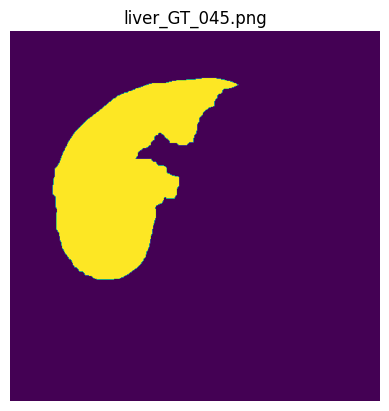

In [190]:
open_png_images(img_folder_path)

In [234]:
#check if all the files in the json exists or not 
paot_file = '/home/s.kapoor/kgong_skapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/dataset/dataset_list/PAOT_train.txt'

In [235]:
main_folder = '/home/s.kapoor/kgong_skapoor/language_guided_segmentation/CLIP-Driven-Universal-Model/'

In [236]:
file_not_there = []

In [237]:
with open(paot_file,'r') as file:
    for line in file.readlines():
        file_paths = line.split()
        for file_path in file_paths:
            act_file_path = os.path.join(main_folder,file_path)
            if not os.path.exists(act_file_path):
                file_not_there.append(act_file_path)

In [238]:
file_not_there

[]